Nota: se requiere revisar el material referente a Python y los videos de Algoritmos y Estructuras de Datos
# Estructura de datos: Diccionarios
<div style="text-align: right">
    Autores: Daniela Moctezuma, Mario Graff, Sabino Miranda, Eric S. Tellez
</div>


Los diccionarios en Python estan implementados como tablas hash.

Como se vió en notebooks anteriores, la sintaxis es mediante llaves y `:`, así como también mediante la función `dict`.

In [30]:
d = {'nombre' : 'Juan', 'edad' : 22, 'numeros':[1,2,3]}
print(d)

d2 = dict(nombre='Pedro', edad=28)
print(d2)

{'nombre': 'Juan', 'edad': 22, 'numeros': [1, 2, 3]}
{'nombre': 'Pedro', 'edad': 28}


Internamente, el interprete de Python creará una tabla hash, asociando la llave con su valor.

# Recuperar valores
Para acceder a los valores asociados a cada llave, el procedimiento es acceder, claro esta, por medio de la llave. El primer paso es determinar la posición o celda dentro de la tabla hash donde se encuentra o debe encontrarse el par llave-valor. Para esto, se aplica la función `hash` a la llave, la cual mapea dicha llave a un número entero. Esta función es determinista, i.e., para una misma llave siempre regresará el mismo valor, y para asegurar el desempeño, la distribución de ese valor no esta asociado con la distribución misma de los datos. En general, el hash puede ser un número muy largo, e incluso negativo, por lo que debe mapearse a una celda válida en la tabla hash (diccionario); éste último mapeo puede ser tan simple como el residuo de la división del valor hash entre el tamaño de la tabla o una transformación lineal para encontrar el índice en la tabla; y la estrategía precisa dependerá de las características de los valores mapeados. La esperanza es que cada celda en la tabla tenga ningún o un número constante (y pequeño) de valores asignados. Con esto también podemos inferir que se siempre se requerirá una tabla con muchas más celdas que datos asignados.

In [31]:
print(d2["nombre"])

Pedro


### La función `hash` se puede aplicar sobre valores inmutables y los mapeará a un entero, y ese valor de entero es poco probable que aparezca para otras llaves diferentes.

In [7]:
edadvar = "edad"
edadvar1 = "edad1"
print("hash-edad-literal: {}\nhash-edad-variable: {}".format(hash('edad'),
                                                             hash(edadvar))


hash-edad-literal: -3081781475738642763
hash-edad-variable: -3081781475738642763
hash-edad1: 1831229893451462569


### Aun los datos con pequeñas variaciones deberían ser mapeados a diferentes enteros, e incluso sin realación entre ellos

In [11]:
edadvar1 = "1111111111111edad"
edadvar2 = "1111111111111edad0"
print("hash-edad1: {}\nhash-edad2: {}".format(hash(edadvar1), hash(edadvar2)))

hash-edad1: 3098178432403470540
hash-edad2: 5131371003110901477


## Asignar valores
Al asignar valores, se ejecuta la función `hash` sobre la llave; y se coloca en la posición indicada (después de pasarlo a un índice valido en la tabla); es posible que la tabla tenga que crecer si la llave no existía. Hayq que tener en cuenta que si hay colisiones, es decir, que otras llaves diferentes sean mapeados a la misma celda de la tabla hash, entonces se debe aplicar algún mecánismo de solución de la colisión.

In [17]:
d = {'nombre' : 'Juan', 'edad' : 22}
print(d)
d["edad"] = 25
print(d)
d["nacionalidad"] = "MX"
print(d)

{'nombre': 'Juan', 'edad': 22}
{'nombre': 'Juan', 'edad': 25}
{'nombre': 'Juan', 'edad': 25, 'nacionalidad': 'MX'}


## Borrar pares-valor

Para borrar una entrada en la tabla hash, primero se debe determinar en que posición se encuentra dicho valor, para esto internamente se aplica la función `hash` y se mapea a una celda valida, luego si existe se procederá a borrar la referencia del par llave-valor. Es posible que la tabla se reduzca de tamaño.

In [19]:
print(d)
del d['edad']
print(d)

{'nombre': 'Juan', 'edad': 25, 'nacionalidad': 'MX'}
{'nombre': 'Juan', 'nacionalidad': 'MX'}


# Membresía
Verificar si una llave existe dentro del diccionario es muy similar a un acceso a los datos, sin embargo, solo contestará con un valor booleano en lugar de acceder a los datos.

In [171]:
'f' in d4

False

# Conteo

Los diccionarios son una estructura fundamental en Python, y habrá muchas tareas que se pueden resolver con ellos.

Por ejemplo, la ocurrencia de cada cáracter en un texto se puede contar como sigue:

In [27]:
s = "Hola mundo hola todos"
dat={}
for c in s:
    if c in dat:
        dat[c] = dat[c] + 1
    else:
        dat[c] = 1

print(dat)
print(list(dat.keys()))
print(list(dat.values()))

{'H': 1, 'o': 5, 'l': 2, 'a': 2, ' ': 3, 'm': 1, 'u': 1, 'n': 1, 'd': 2, 'h': 1, 't': 1, 's': 1}
['H', 'o', 'l', 'a', ' ', 'm', 'u', 'n', 'd', 'h', 't', 's']
[1, 5, 2, 2, 3, 1, 1, 1, 2, 1, 1, 1]


### Por ejemplo, en el paquete `collections` se encuentran los contadores, que adicionalmente tienen otras funciones asociadas

In [29]:
from collections import Counter
cnt = Counter(s)
print(cnt)
print(cnt.most_common(3))

Counter({'o': 5, ' ': 3, 'l': 2, 'a': 2, 'd': 2, 'H': 1, 'm': 1, 'u': 1, 'n': 1, 'h': 1, 't': 1, 's': 1})
[('o', 5), (' ', 3), ('l', 2)]


### Podemos graficar las frecuencias como un histograma

['H', 'o', 'l', 'a', ' ', 'm', 'u', 'n', 'd', 'h', 't', 's'] [1, 5, 2, 2, 3, 1, 1, 1, 2, 1, 1, 1]


<BarContainer object of 12 artists>

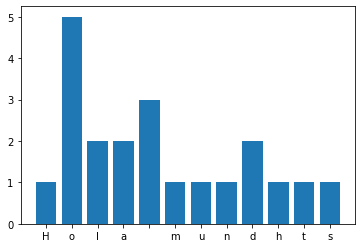

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

k=list(dat.keys())
v=list(dat.values())
print(k,v)
x_pos = [i for i, _ in enumerate(k)]
plt.xticks(x_pos, k)
plt.bar(x_pos, v, align='center')


# Conjuntos: set
Un conjunto se representa como un diccionario sin valor asociado, esto quiere decir que funciona por medio de la función `hash` y que cualquier valor _hasheable_ puede ser utilizado en el diccionario.

In [34]:
A = set(['aaa', '1', 'b', 3, '4', 'c', 'a','a','a']) # inicializando desde una colección
B = set(['aa', '1', 'bb', 3, '5', 'c', 'a'])
print("A:", A)
print("B:", B)

A: {3, '4', '1', 'b', 'c', 'aaa', 'a'}
B: {3, '1', '5', 'c', 'aa', 'bb', 'a'}


### Recordando, al igual que los diccionarios, los conjuntos no soportan valores duplicados

In [36]:
AA = set("anita lava la tina")
print(AA)

{'i', ' ', 'n', 'l', 'v', 't', 'a'}


### Los conjuntos soportan operaciones de unión e intersección eficientes; la eficiencia viene del uso de tablas hash en la implementación.

In [44]:
print("unión:", A.union(B))
print("intersección:", A.intersection(B))
print("diferencia:", A.difference(B))
print("membresía {} in {}: {}".format('aa', A, 'aa' in A))
print("membresía {} in {}: {}".format('aa', B, 'aa' in B))

unión: {3, '4', '1', '5', 'b', 'c', 'aa', 'aaa', 'bb', 'a'}
intersección: {'1', 'c', 3, 'a'}
diferencia: {'aaa', 'b', '4'}
membresía aa in {3, '4', '1', 'b', 'c', 'aaa', 'a'}: False
membresía aa in {3, '1', '5', 'c', 'aa', 'bb', 'a'}: True


# Uso de estructuras para cálculo de similitudes

Existen muchos algoritmos para análisis de datos que útilizan el concepto de función de similitud, esto es, de funciones que miden que tanto se parecen dos objetos entre sí. A continuación veremos como se pueden implementar algunas funciones de similitud utilizando las estructuras que se han visto.

### Coeficiente de Jaccard 
$$J(A,B) = \frac{|A \cap B|}{|A \cup  B|}$$

In [54]:
def jaccard(A, B):
    tI=len(A.intersection(B))
    tU=len(A.union(B))
    return tI/tU

print(jaccard(set("casuchas"), set("casitas")))
print(jaccard(set("casuchas"), set("casuchas")))
print(jaccard(set("casuchas"), set("cartera")))

0.42857142857142855
1.0
0.25


### Coeficiente de Dice 
 $$D(A,B) =  \frac{ 2 \times |A \cap B|}{|A| + |B|}$$

In [53]:
def dice(A, B):
    tI=len(A.intersection(B))
    tU=len(A.union(B))
    return tI/(len(A) + len(B))

print(dice(set("casuchas"), set("casitas")))
print(dice(set("casuchas"), set("casuchas")))
print(dice(set("casuchas"), set("cartera")))

0.3
0.5
0.2


# Analizando el vocabulario de algunos libros del proyecto Gutenberg
El análisis de colecciones de documentos no estructurados es una de las tareas de la ciencia de datos; en particular, una tarea relacionada con procesamiento de lenguaje natural.
Como ejemplo, se utilizarán libros del proyecto [Gutenberg](http://www.gutenberg.org).

Lectura del texto en memoria:

In [55]:
with open("celestina.txt", 'r', encoding='utf8') as f:
    text = f.readlines()
    f.close()

text[:2]

['# The Project Gutenberg Etext of La Celestina by Fernando de Rojas\n', '\n']

## Preprocesamiento de los datos
Una etapa fundamental para el análisis es el preprocesamiento, que es un tratamiento a los datos para prepararlos como entradas a métodos más complejos.

In [56]:
# remover lineas vacias
text2=[]
with open("celestina.txt", 'r', encoding='utf8') as f:
    for l in f.readlines():
        if not l.strip():
            continue
        if l.strip().startswith('#'):
                continue
        text2.append(l.strip().split())
    f.close()

text2[:3]

[['LA', 'CELESTINA'], ['por'], ['Fernando', 'de', 'Rojas']]

## Distribución de los símbolos y conteo de términos
La distribución de los símbolos es una propiedad de un texto que se puede obtenre de la siguiente forma:


In [61]:
from collections import Counter
tt=[]
for t in text2:
    for w in t:
        for c in w:
            tt.extend(c.lower())

print(tt[:10])        
di=Counter(tt)
print(di.most_common(10))

['l', 'a', 'c', 'e', 'l', 'e', 's', 't', 'i', 'n']
[('e', 68311), ('a', 62239), ('o', 44359), ('s', 38267), ('r', 34445), ('n', 30541), ('i', 28738), ('l', 23434), ('u', 23431), ('d', 22706)]


### Histograma de los símbolos en _La Celestina_

<BarContainer object of 54 artists>

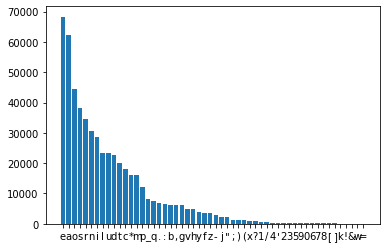

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt

k = sorted(di.items(), key=lambda x: x[-1], reverse=True)
v = [_[-1] for _ in k]
k = [_[0] for _ in k]
x_pos = [i for i, _ in enumerate(k)]
plt.xticks(x_pos, k)
plt.bar(x_pos, v, align='center')

## Términos más frecuentes
El vocabulario de un texto, palabras, se puede generar como sigue:

In [64]:
text2=[]
with open("celestina.txt", 'r', encoding='utf8') as f:
    for l in f.readlines():
        if not l.strip():
            continue
        if l.strip().startswith('#'):
                continue
        text2.append(l.strip().split())
    f.close()
    
text2[0:2]

[['LA', 'CELESTINA'], ['por']]

In [76]:
### from collections import Counter
tt=[]
for t in text2:
    for w in t:
        tt.append(w.lower())
            
di=Counter(tt)
di.most_common(30)

[('que', 4228),
 ('de', 4130),
 ('****', 4022),
 ('e', 2251),
 ('la', 2201),
 ('en', 1832),
 ('a', 1743),
 ('el', 1545),
 ('no', 1524),
 ('por', 1022),
 ('con', 992),
 ('se', 911),
 ('mi', 886),
 ('me', 866),
 ('los', 856),
 ('lo', 788),
 ('es', 761),
 ('su', 715),
 ('y', 687),
 ('tu', 681),
 ('las', 670),
 ('mas', 605),
 ('te', 552),
 ('como', 541),
 ('o', 534),
 ('/', 516),
 ('para', 515),
 ('si', 466),
 ('del', 430),
 ('yo', 409)]

In [87]:
### Graficando los 50 términos más comunes

<BarContainer object of 50 artists>

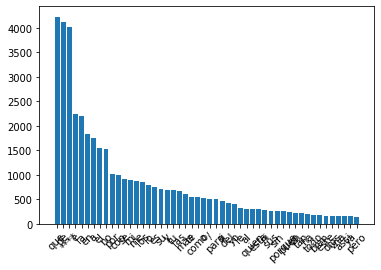

In [86]:
k = di.most_common(50)
v = [_[-1] for _ in k]
k = [_[0] for _ in k]
x_pos = [i for i, _ in enumerate(k)]
plt.xticks(x_pos, k, rotation=45)
plt.bar(x_pos, v, align='center')

In [280]:
s1="vudú"
s1.replace('ú','u')

'vudu'

# Ejercicios
- Calcular el vocabulario del libro _Moby Dick_ (archivo `moby.txt`).
- Graficar las 1000 palabras más frecuentes.
- Calcular y graficar el histograma de las palabras por su longitud.